## Mesh generator

Generate a Delaunay triangulation of a set of points.


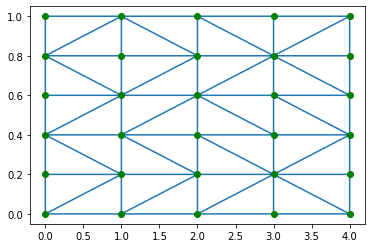

In [4]:
import openmesh as om
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

X = np.arange(0,5,1)
Y = np.arange(0,1.05,0.2)

# X = np.arange(0,5,0.1)
# Y = np.arange(0,1.05,0.02)

P = np.array([[x,y] for y in Y for x in X])
T = Delaunay(P)
plt.triplot(P[:,0],P[:,1],T.simplices)
plt.plot(P[:,0],P[:,1],'go')

In [2]:
import sys
sys.stdout = open('dmx.off', 'w')
# sys.stdout = open("dmx.off", "w")
# o = open('offtest.txt','w')
# print('OFF', file=o)
# o.close()
print('OFF')
print(len(P), len(T.simplices), 0)

Represent the mesh in terms of openmesh classes. Generate the handles of the mesh. The vertex handles are used to generate the face handles. Store the mesh in an ".off" file.

In [3]:
mesh = om.TriMesh()
k=0
vh=[]
for p in P:
    k=k+1; 
    print('%.1f' % p[0] ,'%.1f' % p[1], 0)    
    vh.append(mesh.add_vertex([p[0], p[1], 0]))
    
k=0
for t in T.simplices:
    k=k+1
    print(3,' ',t[0], t[1], t[2])
    mesh.add_face(vh[t[0]],vh[t[1]],vh[t[2]])

om.write_mesh('dm.off', mesh)  

In [ ]:
# sys.stdout.close()
# print('.')